# A1.Transform the speech signal into its spectral domain using numpy.fft.fft(). Plot the amplitude of the spectral components and analyze the results.

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

audio_signal, sampling_rate = librosa.load("Statement.mp3")

fft_result = np.fft.fft(audio_signal)
amplitude_spectrum = np.abs(fft_result)

frequency_bins = np.fft.fftfreq(len(audio_signal), d=1/sampling_rate)

print("FFT Result:\n", fft_result)
print("Amplitude Spectrum:\n", amplitude_spectrum)
print("Frequency Bins:\n", frequency_bins)


FFT Result:
 [-0.6240811 -1.22124533e-14j -0.24103296+6.20276474e-01j
  0.87870826+6.97135977e-01j ...  0.77971798+2.55236021e-01j
  0.87870826-6.97135977e-01j -0.24103296-6.20276474e-01j]
Amplitude Spectrum:
 [0.6240811  0.66546209 1.1216625  ... 0.8204301  1.1216625  0.66546209]
Frequency Bins:
 [ 0.          0.3633697   0.7267394  ... -1.09010909 -0.7267394
 -0.3633697 ]


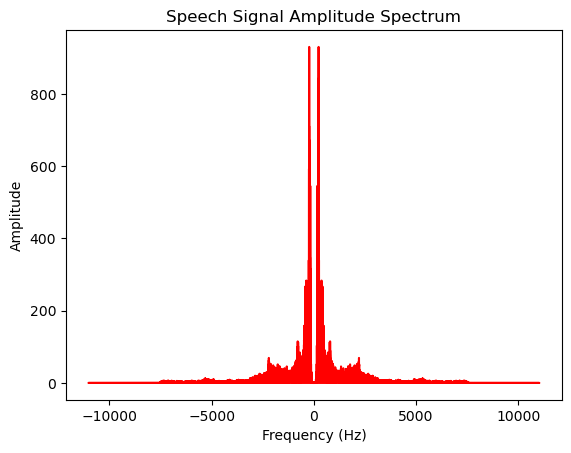

In [3]:
plt.plot(frequency_bins, amplitude_spectrum, color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()

# A2.Utilize numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from the frequency domain back to the time domain. Then, compare the resultant time domain signal with the original signal.


In [5]:
time_domain_signal = np.fft.ifft(fft_result)
time_domain_signal = time_domain_signal[:len(audio_signal)]

C:\Users\vikra\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


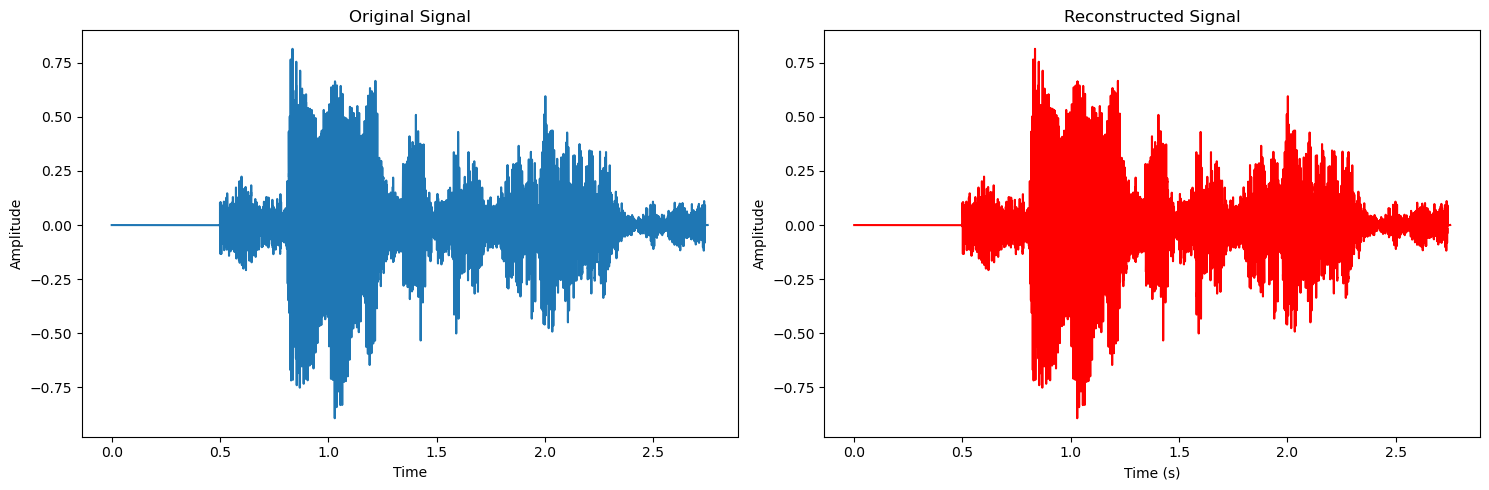

In [6]:
time = np.linspace(0, len(audio_signal)/sampling_rate, len(audio_signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time, audio_signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain_signal, color="red")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()


# A3.Conduct spectral analysis on a specific word within the recorded speech and compare its spectrum with the spectrum of the entire signal.

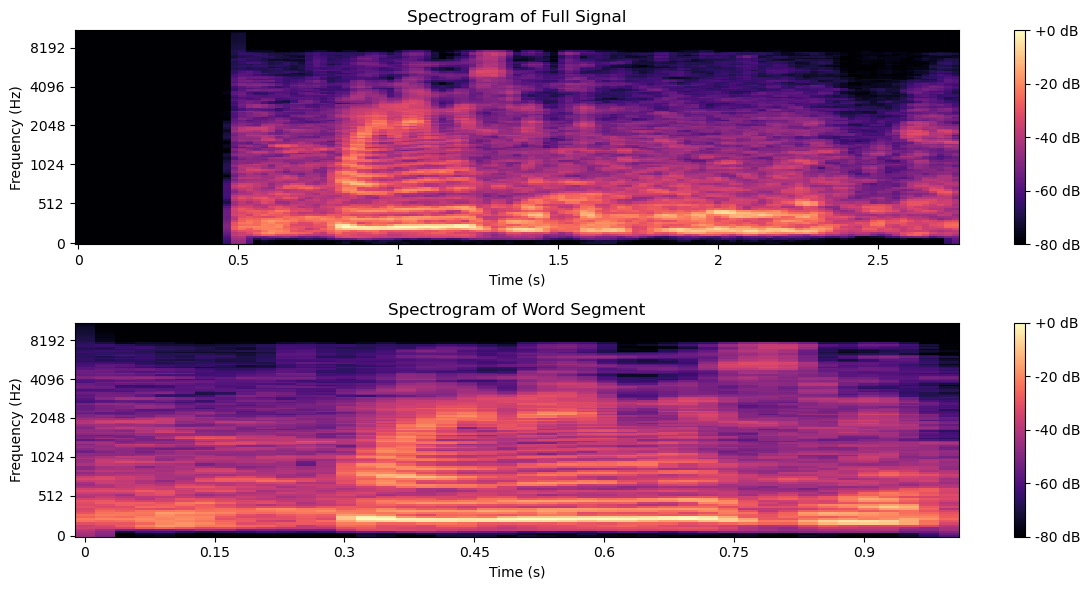

In [7]:
file_path = 'Statement.mp3'
full_signal, sampling_rate = librosa.load(file_path)

word_start_time = 0.5
word_end_time = 1.5

start_sample = librosa.time_to_samples(word_start_time, sr=sampling_rate)
end_sample = librosa.time_to_samples(word_end_time, sr=sampling_rate)

word_segment = full_signal[start_sample:end_sample]

full_spectrum = librosa.feature.melspectrogram(y=full_signal, sr=sampling_rate)
word_spectrum = librosa.feature.melspectrogram(y=word_segment, sr=sampling_rate)

full_spectrum_db = librosa.power_to_db(full_spectrum, ref=np.max)
word_spectrum_db = librosa.power_to_db(word_spectrum, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spectrum_db, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spectrum_db, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


# A4.Analyze the spectral components using FFT for a rectangular window of 20 milliseconds sampled at 22.5 kHz.

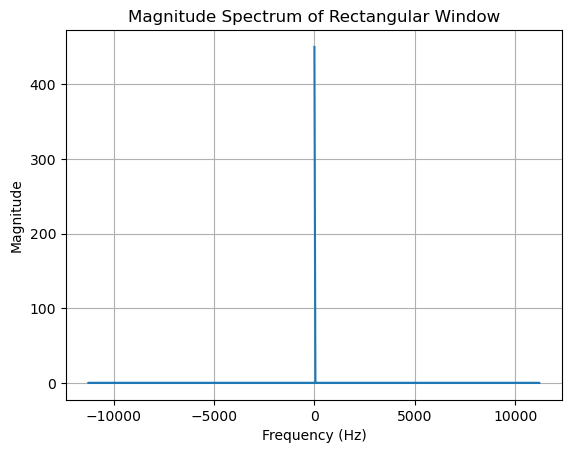

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 22500  
window_duration = 0.02 

window_length = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_length)

fft_result = np.fft.fft(rectangular_window)

frequency_axis = np.fft.fftfreq(window_length, d=1/sampling_rate)

plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


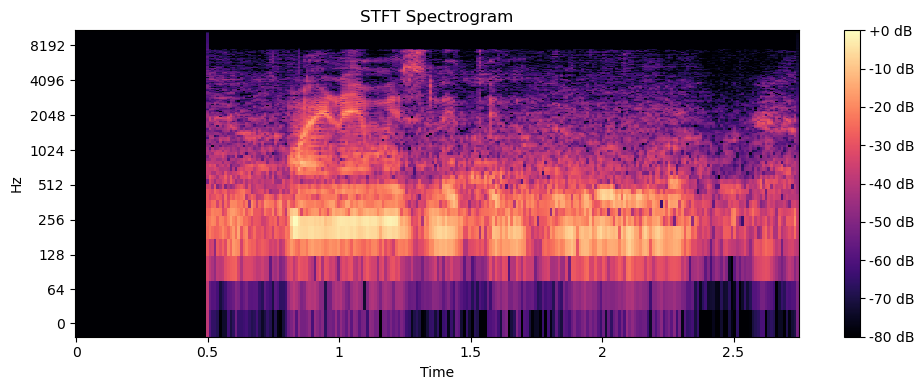

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

file_path = "Statement.mp3"
audio_signal, sampling_rate = librosa.load(file_path)

window_length = int(0.02 * sampling_rate)
hop_length = int(0.01 * sampling_rate)
stft_matrix = librosa.stft(audio_signal, n_fft=window_length, hop_length=hop_length)
stft_amplitude = np.abs(stft_matrix)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft_amplitude, ref=np.max), sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()


# A5.Generate spectrograms of the speech signal using scipy.signal.spectrogram() with the same duration, and then compare the resulting plots.

C:\Users\vikra\AppData\Local\Temp\ipykernel_9496\3428839015.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')


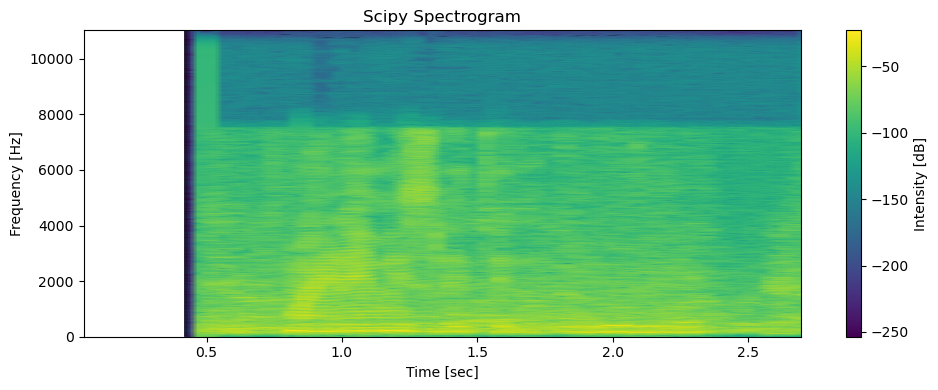

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

file_path = "Statement.mp3"  
audio_signal, sampling_rate = librosa.load(file_path)

frequencies, times, spec_scipy = spectrogram(audio_signal, fs=sampling_rate, nperseg=2048, noverlap=1536)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()
